In [1]:
#pip install --upgrade numexpr
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
random_state=23425237

In [2]:
# for stats tests
import scipy.stats as st
# for regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# to find influential data points
from statsmodels.stats.outliers_influence import OLSInfluence
# for diagnostic tests
import statsmodels.stats.diagnostic as di
import statsmodels.stats.stattools as stt
# for general plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# for the linear regression model and splitting data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [3]:
# Read the data 
file_path="../Stats_CA/Data/mlr7.csv"

def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None




dd=read_csv_to_dataframe(file_path)

dd.head()

y         x1          x2 x3
0  15116.994383  48.330231  203.906565  B
1  16889.339729  48.450240  207.498762  B
2  14170.002472  49.675754  197.181472  C
3  18189.584499  58.266768  197.408598  B
4  15788.441002  50.890988  200.350295  A

In [4]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame(dd)

# Initialize OneHotEncoder (drop first category to avoid multicollinearity)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'x3' column
encoded = encoder.fit_transform(df[['x3']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['x3']))

# Convert float columns to integers (1.0 to 1 and 0.0 to 0)
encoded_df = encoded_df.astype(int)

# Concatenate the encoded columns with the original DataFrame and drop the 'x3' column
df_encoded = pd.concat([df, encoded_df], axis=1).drop('x3', axis=1)

# Display the resulting DataFrame
print("\nDataFrame after One-Hot Encoding:")

print(df_encoded)




DataFrame after One-Hot Encoding:
                y         x1          x2  x3_B  x3_C
0    15116.994383  48.330231  203.906565     1     0
1    16889.339729  48.450240  207.498762     1     0
2    14170.002472  49.675754  197.181472     0     1
3    18189.584499  58.266768  197.408598     1     0
4    15788.441002  50.890988  200.350295     0     0
..            ...        ...         ...   ...   ...
995  15783.900818  49.602117  195.110988     1     0
996  14838.937043  49.986667  199.032523     1     0
997  17463.556168  49.278583  196.511615     0     0
998   9654.214916  41.162457  199.125496     1     0
999  15058.570725  49.757302  202.185777     0     1

[1000 rows x 5 columns]


<Axes: title={'center': 'Correlation Heatmap'}>

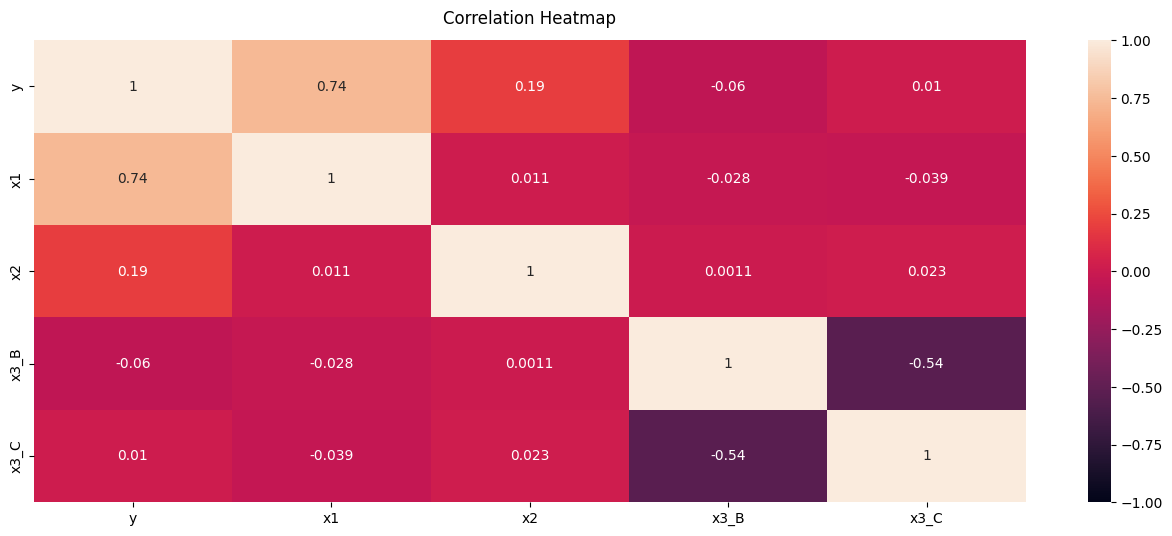

In [5]:
## Calculate correlation >0 or positive correlation
def heat_map_corr(df):
# Increase the size of the heatmap.
    plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
    return heatmap 
## function to display distribution plot


heat_map_corr(df_encoded)

In [6]:
# Split the data into dependent (y) and independent (X) variables
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [7]:
# check shape of the train and test data  
print(f"shape of the x-training set: {X_train.shape}")
print(f"shape of the y-train set: {y_train.shape}")
print(f"shape of the x-test set: {X_test.shape}")
print(f"shape of the y-test set: {y_test.shape}")

shape of the x-training set: (800, 4)
shape of the y-train set: (800,)
shape of the x-test set: (200, 4)
shape of the y-test set: (200,)


In [8]:
# multi linear regression 

X=X_train
# add the intercept
model_intercept = sm.add_constant(X)
# specify the linear regression model
mlt_model = sm.OLS(
# the response or dependent variable
y_train,
# the independent variables and intercept
model_intercept
)
# fit the linear regression model
fit = mlt_model.fit()
# print a summary of the fitted model
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     286.4
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          2.05e-152
Time:                        15:19:17   Log-Likelihood:                -6702.7
No. Observations:                 800   AIC:                         1.342e+04
Df Residuals:                     795   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.537e+04   1847.678     -8.318      0.0

In [9]:
# Drop 'x3_C' column
df_encoded = df_encoded.drop('x3_C', axis=1)
print("\nDataFrame after dropping 'x3_C' column:")
print(df_encoded)



DataFrame after dropping 'x3_C' column:
                y         x1          x2  x3_B
0    15116.994383  48.330231  203.906565     1
1    16889.339729  48.450240  207.498762     1
2    14170.002472  49.675754  197.181472     0
3    18189.584499  58.266768  197.408598     1
4    15788.441002  50.890988  200.350295     0
..            ...        ...         ...   ...
995  15783.900818  49.602117  195.110988     1
996  14838.937043  49.986667  199.032523     1
997  17463.556168  49.278583  196.511615     0
998   9654.214916  41.162457  199.125496     1
999  15058.570725  49.757302  202.185777     0

[1000 rows x 4 columns]


In [11]:
# Split the data into dependent (y) and independent (X) variables
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [12]:
# check shape of the train and test data  
print(f"shape of the x-training set: {X_train.shape}")
print(f"shape of the y-train set: {y_train.shape}")
print(f"shape of the x-test set: {X_test.shape}")
print(f"shape of the y-test set: {y_test.shape}")

shape of the x-training set: (800, 3)
shape of the y-train set: (800,)
shape of the x-test set: (200, 3)
shape of the y-test set: (200,)


In [13]:
# multi linear regression 

X=X_train
# add the intercept
model_intercept = sm.add_constant(X)
# specify the linear regression model
mlt_model = sm.OLS(
# the response or dependent variable
y_train,
# the independent variables and intercept
model_intercept
)
# fit the linear regression model
fit = mlt_model.fit()
# print a summary of the fitted model
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     382.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          9.72e-154
Time:                        15:21:46   Log-Likelihood:                -6702.7
No. Observations:                 800   AIC:                         1.341e+04
Df Residuals:                     796   BIC:                         1.343e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.537e+04   1846.524     -8.322      0.0

In [19]:
#Let’s use the model to predict the values of y for all values of x1 and x2 in the test data.
x = X_test
c = sm.add_constant(x)
y_predicted = fit.predict(c)
y_actual = y_test

y_predicted



45     15297.689102
865    15962.315674
24     16514.219509
78     16152.583690
875    15635.115478
           ...     
343    15700.257603
421    16217.845122
248    11888.834219
79     15268.067931
473    18703.707479
Length: 200, dtype: float64

In [41]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_actual, y_predicted)
mse = metrics.mean_squared_error(y_actual, y_predicted)
r2 = np.sqrt(metrics.mean_squared_error(y_actual, y_predicted))
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

print('Mean Absolute Error:', mae)
print('Mean Absolute percentage Error:', mape)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 788.8673239038579
Mean Absolute percentage Error: 5.176982360497353
Mean Square Error: 1056095.6624260377
Root Mean Square Error: 1027.6651509251628


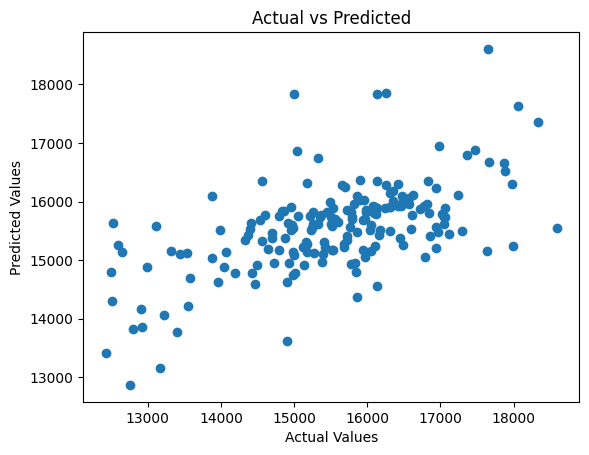

In [56]:
plt.scatter(y_actual, y_predicted)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

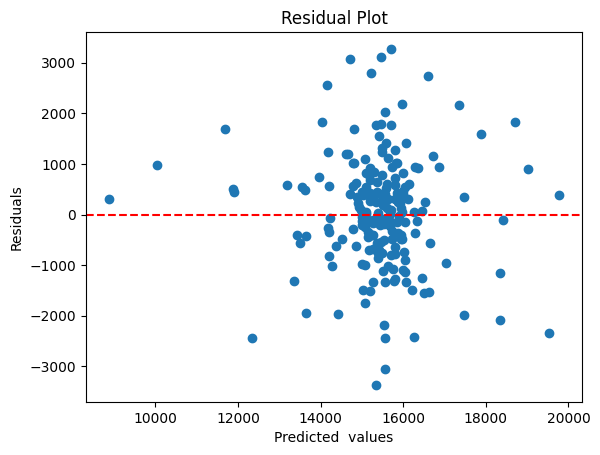

In [25]:
residuals = y_actual - y_predicted
plt.scatter(y_predicted, residuals)
plt.xlabel('Predicted  values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [30]:
# Remove the outliers from y column

def remove_outliers_IQR(df, column_name, threshold=1.5):
    # Extract the column as a numpy array
    data = df[column_name].values
    
    # Find first and third quartiles
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Compute IQR
    IQR = Q3 - Q1
    
    # Compute lower and upper bound
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    
    # Remove outliers from the original dataframe
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned




In [32]:
remove_outliers=remove_outliers_IQR(df_encoded,'y')

In [33]:
# Split the data into dependent (y) and independent (X) variables
X = remove_outliers.drop('y', axis=1)
y = remove_outliers['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [34]:
# check shape of the train and test data  
print(f"shape of the x-training set: {X_train.shape}")
print(f"shape of the y-train set: {y_train.shape}")
print(f"shape of the x-test set: {X_test.shape}")
print(f"shape of the y-test set: {y_test.shape}")

shape of the x-training set: (749, 3)
shape of the y-train set: (749,)
shape of the x-test set: (188, 3)
shape of the y-test set: (188,)


In [35]:
# multi linear regression after removing the outliers did not improve the model with R2 dropping to 0.40

X=X_train
# add the intercept
model_intercept = sm.add_constant(X)
# specify the linear regression model
mlt_model = sm.OLS(
# the response or dependent variable
y_train,
# the independent variables and intercept
model_intercept
)
# fit the linear regression model
fit = mlt_model.fit()
# print a summary of the fitted model
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           6.28e-83
Time:                        15:52:09   Log-Likelihood:                -6205.4
No. Observations:                 749   AIC:                         1.242e+04
Df Residuals:                     745   BIC:                         1.244e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.113e+04   1924.935     -5.782      0.0

In [36]:
#Let’s use the model to predict the values of y for all values of x1 and x2 in the test data.
x = X_test
c = sm.add_constant(x)
y_predicted = fit.predict(c)
y_actual = y_test

y_predicted



51     15573.845179
447    15161.981951
583    17354.720630
71     15428.124975
642    15137.367828
           ...     
771    16350.015565
197    15544.039860
839    16356.465640
372    15379.335336
4      15738.722580
Length: 188, dtype: float64

In [37]:
errors = y_predicted - y_actual
absolute_errors = abs(errors)
sum_absolute_errors = absolute_errors.sum()
mae = sum_absolute_errors/len(y_predicted)
mae


np.float64(788.8673239038579)

In [40]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_actual, y_predicted)
mse = metrics.mean_squared_error(y_actual, y_predicted)
r2 = np.sqrt(metrics.mean_squared_error(y_actual, y_predicted))
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

print('Mean Absolute Error:', mae)
print('Mean Absolute percentage Error:', mape)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)


Mean Absolute Error: 788.8673239038579
Mean Absolute percentage Error: 5.176982360497353
Mean Square Error: 1056095.6624260377
Root Mean Square Error: 1027.6651509251628


In [42]:

y_hat = fit.fittedvalues.values.tolist()
residuals = fit.resid
influence = fit.get_influence()
standardised_residuals = influence.resid_studentized_internal
studentised_residuals = influence.resid_studentized_external
root_residuals = abs(studentised_residuals)**0.5
leverage = influence.hat_matrix_diag
cooks_distances, p = influence.cooks_distance
np.random.seed(42)
theoretical_quantiles = np.sort(
np.random.normal(
loc = 0,
scale = 1,
size = len(residuals)
)
)
outliers = [i+1 if abs(s) > 2 else "" for i,s in zip(range(len(fit.resid)),studentised_residuals)]
loess = sm.nonparametric.lowess(
root_residuals,
y_hat,
it = 0,
delta = 0.01 * (max(y_hat) - min(y_hat))
)

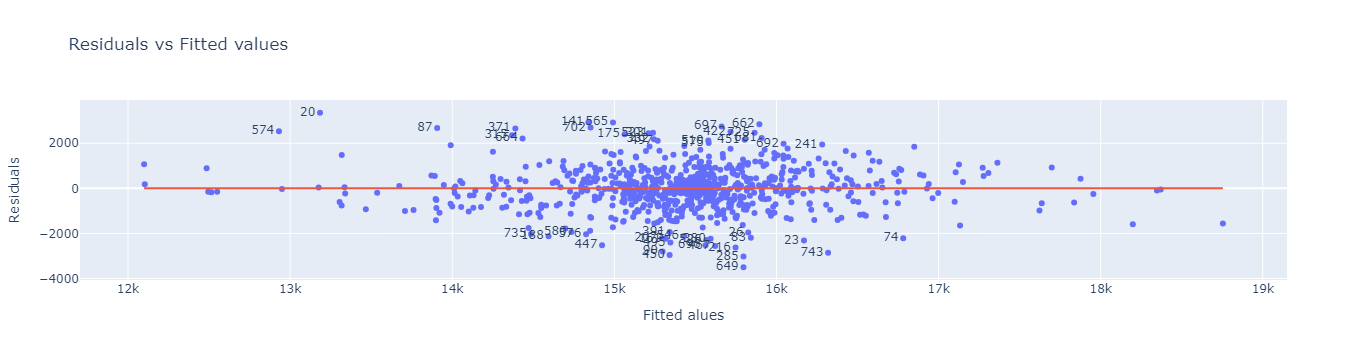

In [43]:
fig = go.Figure(
go.Scatter(
x = y_hat,
y = residuals,
text = outliers,
mode = "markers+text",
    showlegend = False
)
)
fig = fig.update_traces(textposition = "middle left")
fig = fig.add_trace(
go.Scatter(
x = loess[:,0],
y = loess[:,1],
mode = "lines",
showlegend = False
)
)
fig.update_layout(
title = "Residuals vs Fitted values",
xaxis_title = "Fitted alues",
yaxis_title = "Residuals"
)

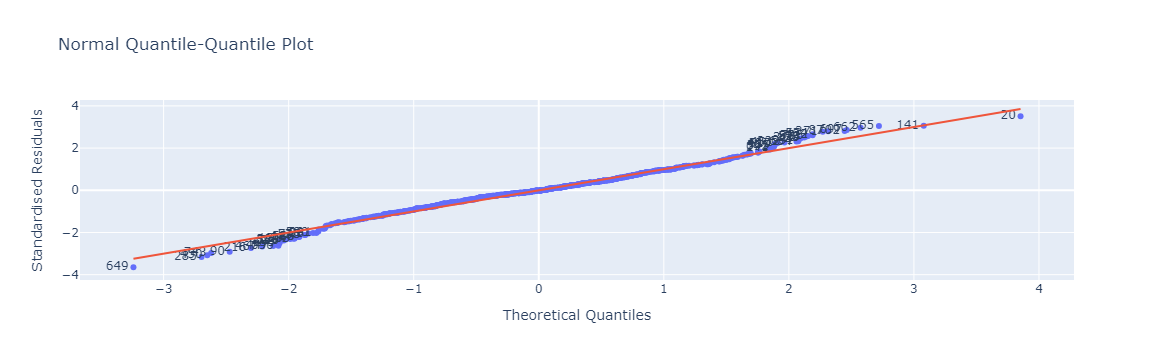

In [44]:

resid_dict = dict(zip(standardised_residuals,outliers))
sorted_residuals = sorted(resid_dict)
sorted_outliers = [resid_dict[residual] for residual in sorted_residuals]
fig = go.Figure(
go.Scatter(
    x = theoretical_quantiles,
    y=sorted_residuals,
    text = sorted_outliers,
    mode = "markers+text",
    showlegend = False
    )
)    
fig = fig.add_trace(
go.Scatter(
    x = theoretical_quantiles,
    y = theoretical_quantiles,
    mode = "lines",
    showlegend = False
    )
)
fig = fig.update_traces(textposition = "middle left")
fig.update_layout(
    title="Normal Quantile-Quantile Plot",
    xaxis_title="Theoretical Quantiles",
    yaxis_title="Standardised Residuals")

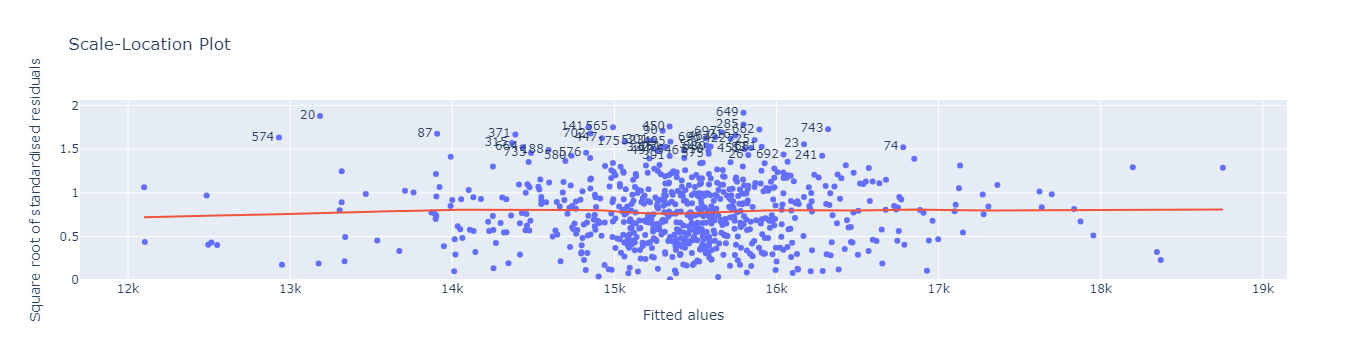

In [45]:
fig = go.Figure(go.Scatter(
x = y_hat,
y = root_residuals,
text = outliers,
hoverinfo = "skip",
mode = "markers+text",
showlegend=False)
)
fig = fig.update_yaxes(rangemode = "tozero")
fig = fig.update_traces(textposition = "middle left")
fig = fig.add_trace(go.Scatter(
x = loess[:,0],
y = loess[:,1],
mode = "lines",
name = "LOESS",
showlegend = False)
)
fig.update_layout(
title = "Scale-Location Plot",
xaxis_title = "Fitted alues",
yaxis_title = dict(text="Square root of standardised residuals",font=dict(size=14))
)

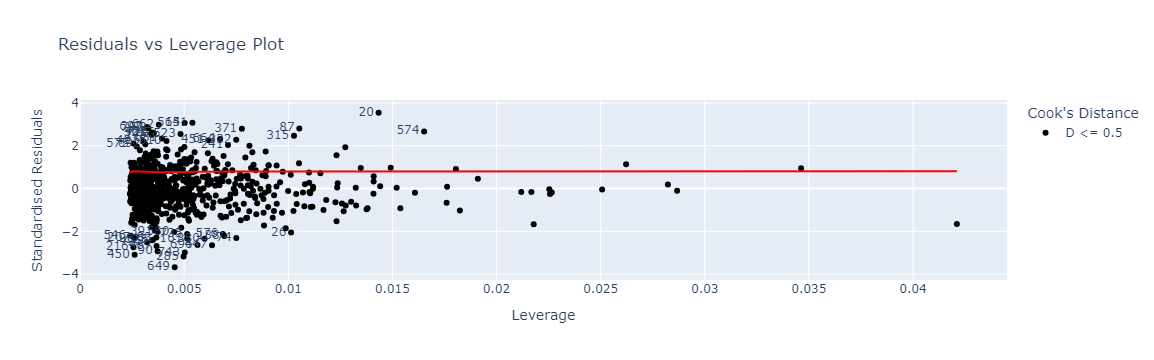

In [49]:
# add a trace for observations with Cook's distances less than or equal to 0.5
fig = go.Figure(
go.Scatter(
x = [l for l,c in zip(leverage,cooks_distances) if c <= 0.5],
y = [s for s,c in zip(studentised_residuals,cooks_distances) if c <= 0.5],
mode = "markers+text",
text = [o for o,c in zip(outliers,cooks_distances) if c <= 0.5],
marker_color = "black",
marker_symbol = 0,
name = "D <= 0.5",
showlegend = True
)
)
# add a trace for observations with Cook's distances greater than 0.5 and less than 1
fig = fig.add_trace(
go.Scatter(
x = [l for l,c in zip(leverage,cooks_distances) if c > 0.5 and c < 1],
y = [s for s,c in zip(studentised_residuals,cooks_distances) if c > 0.5 and c < 1],
mode = "markers+text",
text = [str(o)+" D="+str(round(c,2)) for o,c in zip(outliers,cooks_distances)
if c > 0.5 and c < 1],
marker_color = "orange",
marker_symbol = 1,
name = "0.5 < D < 1",
showlegend = True
)
)
# add a trace for observations with Cook's distances greater than or equal to 1
fig = fig.add_trace(
go.Scatter(
x = [l for l,c in zip(leverage,cooks_distances) if c >= 1],
y = [s for s,c in zip(studentised_residuals,cooks_distances) if c >= 1],
mode = "markers+text",
text = [str(o)+" D="+str(round(c,2)) for o,c in zip(outliers,cooks_distances) if c >= 1],
marker_color = "red",
marker_symbol = 2,
name = "D >= 1",
showlegend = True
))
# set the x-axis to start at zero
fig = fig.update_xaxes(rangemode = "tozero")
# add the loess line trace
fig = fig.add_trace(
go.Scatter(
x = np.sort(leverage),
y = loess[:,1],
marker_color = "red",
mode = "lines",
name = "LOESS",
showlegend = False
)
)
fig = fig.update_traces(textposition = "middle left")
# set chart and axis titles
fig.update_layout(
title = "Residuals vs Leverage Plot",
legend_title = "Cook's Distance",
xaxis_title = "Leverage",
yaxis_title = "Standardised Residuals"
)

In [52]:
# new: het_breuschpagan now requires on variable in the data be a constant.

df = X_train
df["const"] = 1
report = r"The test statistic is {:.3f}. The p-value is {:.3f}."
statistic, pvalue, fstat, fpvalue = di.het_breuschpagan(residuals, df)
print(report.format(statistic, pvalue))

The test statistic is 6.621. The p-value is 0.085.


In [53]:
# Normality - The Shapiro-Wilk test
report = "The test statistic is {:.3f}. The p-value is {:.3f}."
statistic, pvalue = st.shapiro(residuals)
print(report.format(statistic, pvalue))


The test statistic is 0.988. The p-value is 0.000.
